**Malaria Parasite Species Classification**

This program will train our algorithm or model using our train data and evaluate on validation set to know how our model performs.

**Program Flow**:

1. Import necessary packages
2. Specify path to our data
3. Define Datablock which will create train(80% of data) and validation set(20% of data). Our model will run on the train data and evaluate on the validation set to know how well it performs. Data transformation is also applied to help increase accuracy.
4. Show samples of our data
5. Train our model and evaluate on validation/test set, also output evaluation score of model.

import necessary package which is necessary to build our model. This task uses fastai to build and evaluate the deep learning model

In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.metrics import accuracy, Precision, Recall
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
from fastai.data.transforms import GrandparentSplitter

In [2]:
#path to data to train and evaluate our deep learning model
#DATASET_PATH = Path('/kaggle/input/malaria-species/malaria_species_identification/train')
DATASET_PATH = Path('/kaggle/input/malaria-species/malaria_species_identification')

The code below will create a datablock which will format our data to create train and validation set which will be used evaluate our model.

Data transformation will be applied to our train data to help increase accuracy of model/algorithm

In [3]:
# Transformations are applied only on training dataset
mask_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(train_name='train', valid_name='test'),
    #splitter=RandomSplitter(valid_pct=0.2, seed=100),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2)
)

In [4]:
dls = mask_datablock.dataloaders(DATASET_PATH)

The code below will show sample images of data in our train set. Our data include 4 classes of malaria parasite species which include: Ovale, Falciparum, Vivax, Malariae

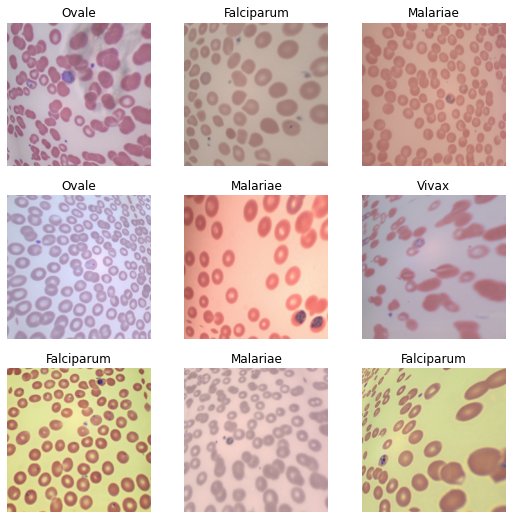

In [5]:
data = mask_datablock.dataloaders(DATASET_PATH, bs=64)
data.show_batch()

The code below will use a pretrained deep learning model called 'resnet34' which is already trained on other image data. This process is called 'transfer learning' and will also assist to build more accurate model. The code will also calculate the error_rate, accuracy, precision, recall of the model after training and evaluating on the validation set.

In [6]:
#data.show_batch(nrows=4)

In [7]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy, Precision(average='macro'),
               Recall(average='macro')])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [8]:
learn.fine_tune(16)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,2.928004,1.781731,0.625000,0.375000,0.300000,0.375000,00:29


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,time
0,2.719588,1.666256,0.583333,0.416667,0.357576,0.416667,00:27
1,2.675997,1.589074,0.583333,0.416667,0.446154,0.416667,00:28
2,2.367213,1.492342,0.583333,0.416667,0.464286,0.416667,00:27
3,2.135520,1.380703,0.625000,0.375000,0.353125,0.375000,00:27
4,2.004772,1.192707,0.625000,0.375000,0.353125,0.375000,00:27
5,1.836927,0.956861,0.416667,0.583333,0.744643,0.583333,00:27
6,1.634726,0.698667,0.333333,0.666667,0.671429,0.666667,00:28
7,1.506297,0.501117,0.208333,0.791667,0.816071,0.791667,00:28
8,1.383110,0.383080,0.208333,0.791667,0.833333,0.791667,00:29
9,1.269644,0.335147,0.208333,0.791667,0.833333,0.791667,00:29


Our model accuracy shows that approximately 1 of every 10 labels is incorrect, and 9 is correct.

precision shows that approximately 1 of every 10 labels by our program is false, and 9 is true.

recall/sensitivity shows that approximately 1 of every 10 true label in reality are missed by our program and 9 labeled as true

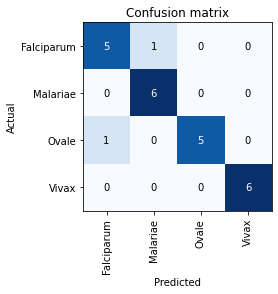

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The diagram above is called a 'confusion matrix'. This matrix shows us that our model correctly predicted Falciparum and Vivax classes.

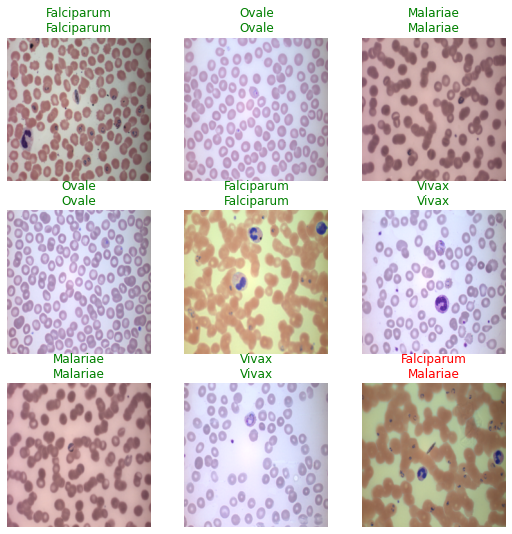

In [10]:
learn.show_results()

The diagram above shows us classes our model correctly predicted and those it missed.

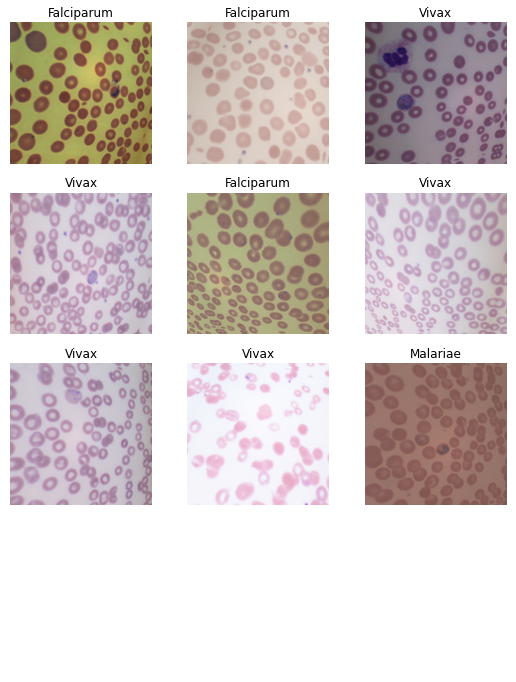

In [11]:
#most common specie
data.show_batch(nrows=4)

Falciparum is the most common specie from our analysis.

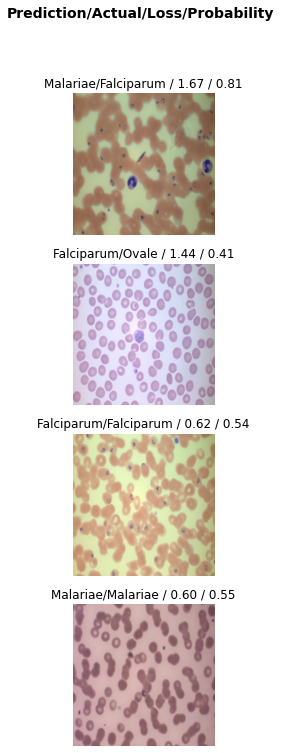

In [12]:
interp.plot_top_losses(4, nrows=4)

In [13]:
preds, y_true=learn.get_preds()
y_true.shape, preds.shape

((24,), torch.Size([24, 4]))

In [14]:
y_true=y_true.numpy() 
preds=np.argmax(preds.numpy(), axis=-1)
y_true.shape, preds.shape

((24,), (24,))

In [15]:
classes = list(data.vocab)
report = classification_report(y_true, preds, target_names=classes)
print(report)

              precision    recall  f1-score   support

  Falciparum       0.83      0.83      0.83         6
    Malariae       0.86      1.00      0.92         6
       Ovale       1.00      0.83      0.91         6
       Vivax       1.00      1.00      1.00         6

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



In [16]:
learn.export()